# Marketing Startegy Analysis

Table of Content
1. Introduction
2. Data Loading and Quality
3. Feature Additions and Engineering
4. Exploratory Data Analysis and Statistical Analysis
5. Final Recommendations (Optimal Sales)

# 1. Business Goal

Company wants to analyse below paramters for their marketing data to.

1. What is the impact of each marketing strategy and sales visit on Sales (Amount Collected)?
2. Is the same strategy valid for all the different client types ?

# 2. Data Loading and Quality Checks

In [309]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import scipy.stats

In [230]:
df = pd.read_csv('Campaign-Data.csv')

In [231]:
df.columns

Index(['Client ID', 'Client Type', 'Number of Customers', 'Montly Target',
       'Zip Code', 'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition'],
      dtype='object')

In [232]:
df.head()

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              2976 non-null   object 
 1   Client Type            2976 non-null   object 
 2   Number of Customers    2976 non-null   int64  
 3   Montly Target          2976 non-null   int64  
 4   Zip Code               2976 non-null   int64  
 5   Calendardate           2976 non-null   object 
 6   Amount Collected       2976 non-null   int64  
 7   Unit Sold              2976 non-null   int64  
 8   Campaign (Email)       2976 non-null   float64
 9   Campaign (Flyer)       2976 non-null   float64
 10  Campaign (Phone)       2976 non-null   float64
 11  Sales Contact 1        2976 non-null   float64
 12  Sales Contact 2        2976 non-null   float64
 13  Sales Contact 3        2976 non-null   float64
 14  Sales Contact 4        2976 non-null   float64
 15  Sale

In [234]:
df.Calendardate = pd.to_datetime(df.Calendardate)

/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_55369/373714253.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.Calendardate = pd.to_datetime(df.Calendardate)


In [235]:
df.isnull().sum()

Client ID                0
Client Type              0
Number of Customers      0
Montly Target            0
Zip Code                 0
Calendardate             0
Amount Collected         0
Unit Sold                0
Campaign (Email)         0
Campaign (Flyer)         0
Campaign (Phone)         0
Sales Contact 1          0
Sales Contact 2          0
Sales Contact 3          0
Sales Contact 4          0
Sales Contact 5          0
Number of Competition    0
dtype: int64

In [236]:
df.describe()

,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5
count,2976.000000,2976.000000,2976.0,2.976000e+03,2976.000000,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03
mean,1456.935484,75.080645,1003.0,1.700440e+07,121.464718,1.432850e+05,6.854186e+05,2.977743e+04,1.313407e+05,2.023319e+06,1.867487e+06,7.076361e+04,1.462954e+04
std,1669.848734,87.042114,0.0,3.025803e+07,216.413984,7.230452e+05,1.727587e+06,3.832134e+05,1.034882e+06,3.396991e+06,3.271349e+06,3.869872e+05,8.905955e+04
min,0.000000,5.000000,1003.0,-2.216150e+07,-63.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,240.000000,10.000000,1003.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,960.000000,47.500000,1003.0,3.409460e+06,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.450000e+05,3.225000e+05,0.000000e+00,0.000000e+00
75%,2090.000000,101.250000,1003.0,2.045676e+07,147.000000,0.000000e+00,8.148285e+04,0.000000e+00,0.000000e+00,2.580000e+06,2.580000e+06,0.000000e+00,0.000000e+00
max,9840.000000,510.000000,1003.0,2.079771e+08,1500.000000,1.144673e+07,1.359395e+07,9.617380e+06,2.902500e+07,3.063750e+07,2.612250e+07,4.837500e+06,1.612500e+06


<Axes: >

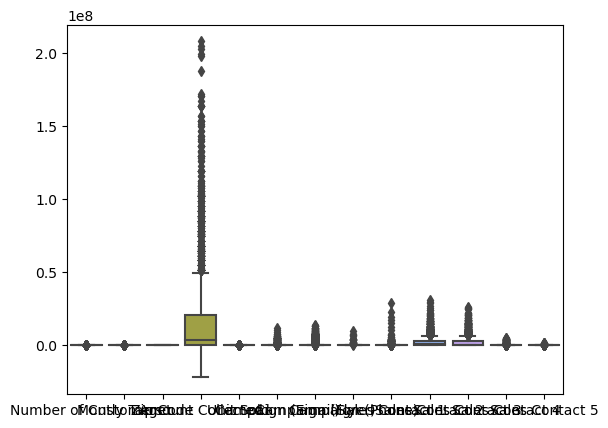

In [237]:
sns.boxplot(data = df)

# 3. Feature Additons & Engineering

In [238]:
# Correct column names

df.rename(columns = {'Montly Target': 'Monthly Target'}, inplace = True)
df.columns

Index(['Client ID', 'Client Type', 'Number of Customers', 'Monthly Target',
       'Zip Code', 'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition'],
      dtype='object')

In [239]:
# feature Engineering (creating new features/columns)

df['Calendardate'] = pd.to_datetime(df['Calendardate'])
df['Calendar_Month'] = df['Calendardate'].dt.month
df['Calendar_Year'] = df['Calendardate'].dt.year
print ('after adding column')
df.head()

after adding column


,Client ID,Client Type,Number of Customers,Monthly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_Month,Calendar_Year
0,ID-987275,Medium Facility,2800,125,1003,2014-01-16,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,1,2014
1,ID-987275,Medium Facility,2800,125,1003,2014-02-16,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low,2,2014
2,ID-987275,Medium Facility,2800,125,1003,2014-03-18,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,3,2014
3,ID-987275,Medium Facility,2800,125,1003,2014-04-18,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low,4,2014
4,ID-987275,Medium Facility,2800,125,1003,2014-05-19,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,5,2014


# 4. Exploratory Data Analysis and Statistical Analysis
We can have a detailed exploration that can be added to this section, but since we only need to answer three questions:

<b> 4.1 Exploring and Understanding basics data </b>

1. Distribution of Data across different client/accounts
2. Difference of Sales in Account/Client Types (Using Categorical Mean)

<b> 4.2 Statistical Analysis - Answering the Questions</b>
1. Impact of Marketing Strategy on Sales (Using Correlation, Regression and Decision Tree)
2. Impact of Competition on Sales
3. How different types of client can have different strategies (Broken down Question 1 and Question 2 based on Account Type)

In [240]:
df['Client Type'].value_counts(normalize = True)

Large Facility      0.459677
Small Facility      0.282258
Medium Facility     0.169355
Private Facility    0.088710
Name: Client Type, dtype: float64

In [241]:
pd.crosstab(df['Number of Competition'], df['Client Type'], margins = True, normalize = 'columns')

Client Type,Large Facility,Medium Facility,Private Facility,Small Facility,All
Number of Competition,,,,,
High,0.166667,0.166667,0.166667,0.166667,0.166667
Low,0.833333,0.833333,0.833333,0.833333,0.833333


In [242]:
df.groupby('Client Type').mean()

/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_55369/3278273781.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Client Type').mean()


,Number of Customers,Monthly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Calendar_Month,Calendar_Year
Client Type,,,,,,,,,,,,,,,
Large Facility,1380.842105,71.578947,1003.0,1.999880e+07,143.098684,142273.609649,8.192056e+05,45595.436623,133667.763158,2.034013e+06,2.017039e+06,119287.280702,16266.447368,6.5,2014.5
Medium Facility,3940.761905,202.857143,1003.0,4.075997e+07,290.583333,437217.097817,1.552603e+06,49176.847619,398645.833333,4.822783e+06,4.698646e+06,85104.166667,33273.809524,6.5,2014.5
Private Facility,400.727273,20.454545,1003.0,5.030246e+06,35.784091,5183.715152,2.272919e+05,5522.470455,1221.590909,6.376705e+05,4.434375e+05,3664.772727,12215.909091,6.5,2014.5
Small Facility,422.514286,21.285714,1003.0,1.637759e+06,11.689286,11975.986310,9.120875e+04,0.000000,8062.500000,7.617143e+05,3.727946e+05,4223.214286,1535.714286,6.5,2014.5


# Correlation Analysis

In [243]:
data.corr()[['Amount Collected']].sort_values(by = 'Amount Collected', ascending = False)

/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_55369/3099581060.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()[['Amount Collected']].sort_values(by = 'Amount Collected', ascending = False)


,Amount Collected
Amount Collected,1.000000
Unit Sold,0.997515
Montly Target,0.608204
Number of Customers,0.607496
Sales Contact 2,0.552112
Campaign (Flyer),0.444337
Sales Contact 3,0.357887
Sales Contact 1,0.277478
Campaign (Email),0.248235
Sales Contact 4,0.236165


In [244]:
# Consolidated Strategy for Targeting

# Set output table color
cp = sns.light_palette("orange", as_cmap = True)

#Creating new dataframe with correlation data
cor_analysis = pd.DataFrame(df[['Amount Collected', 'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()

# Naming the columns
cor_analysis.columns = ['Impacting variable', 'Impact(Corr)']

# Removing 'Amount Collected' column from being analysed for correlation itself
cor_analysis = cor_analysis[cor_analysis['Impacting variable'] != 'Amount Collected']

# Sorting Values of the table in desceding order of correlation value
cor_analysis = cor_analysis.sort_values('Impact(Corr)', ascending = False)

# Setting precision or limiting correlation value to 2 decimals
cor_analysis.style.background_gradient(cmap = cp).set_precision(2)

/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_55369/2279590598.py:21: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor_analysis.style.background_gradient(cmap = cp).set_precision(2)


,Impacting variable,Impact(Corr)
5,Sales Contact 2,0.55
2,Campaign (Flyer),0.44
6,Sales Contact 3,0.36
4,Sales Contact 1,0.28
1,Campaign (Email),0.25
7,Sales Contact 4,0.24
8,Sales Contact 5,0.10
3,Campaign (Phone),0.03


# Market Strategy Impact on Sales by Client Type

In [245]:

# Set output table color
cp = sns.light_palette("orange", as_cmap = True)

#Creating new dataframe with correlation data
cor_analysis = pd.DataFrame(df.groupby('Client Type')[['Amount Collected',
        'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
        'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
        'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()

# Naming the columns
cor_analysis.columns = ['Client Type','Impacting variable on sales', 'Impact(Cor)']

# Sorting Values of the table in desceding order of Client type and then by correlation value
cor_analysis = cor_analysis.sort_values(['Client Type', 'Impact(Cor)'], ascending = False)

# Removing 'Amount Collected' column from being analysed for correlation itself
cor_analysis = cor_analysis[cor_analysis['Impacting variable on sales'] != 'Amount Collected'].reset_index(drop=True)

# Setting precision or limiting correlation value to 2 decimals
cor_analysis.style.background_gradient(cmap = cp).set_precision(2)

/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_55369/4204326483.py:20: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor_analysis.style.background_gradient(cmap = cp).set_precision(2)


,Client Type,Impacting variable on sales,Impact(Cor)
0,Small Facility,Sales Contact 2,0.22
1,Small Facility,Sales Contact 3,0.07
2,Small Facility,Campaign (Email),0.06
3,Small Facility,Campaign (Flyer),0.04
4,Small Facility,Sales Contact 4,0.02
5,Small Facility,Sales Contact 5,0.00
6,Small Facility,Sales Contact 1,-0.02
7,Small Facility,Campaign (Phone),nan
8,Private Facility,Sales Contact 2,0.57
9,Private Facility,Campaign (Flyer),0.28


# Regression Analysis (Market Sales & Strategy)

In [246]:
# Importing libraries to run stats models
import statsmodels.api as sm
import statsmodels.formula.api as smf

df.columns = [mystring.replace(" ", "_") for mystring in df.columns]
df.columns = [mystring.replace("(", "") for mystring in df.columns]
df.columns = [mystring.replace(")", "") for mystring in df.columns]

results = smf.ols('Amount_Collected ~ Campaign_Email + Campaign_Flyer + Campaign_Phone +\
            Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4 + Sales_Contact_5', data = df).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     342.1
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        16:56:25   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.481e+06   5.12e+05     

In [247]:
# Let's convert the above result summary output into a dataframe

df1 = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0]
df1.head()

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.481000e+06,512000.000,2.891,0.004,477000.000,2490000.000
Campaign_Email,7.932000e-01,0.597,1.329,0.184,-0.377,1.963
Campaign_Flyer,3.337600e+00,0.260,12.831,0.000,2.828,3.848
Campaign_Phone,7.340000e-02,1.053,0.070,0.944,-1.991,2.137
Sales_Contact_1,4.236800e+00,0.415,10.207,0.000,3.423,5.051


In [248]:
#Lets's change the index to default numbers
df1 = df1.reset_index()

# Filtering for value less than 0.05 (significance/confidence level)
df1 = df1[df1['P>|t|'] < 0.05][['index', 'coef']].sort_values(by = 'coef').reset_index(drop = True)

df1

,index,coef
0,Sales_Contact_3,2.343200e+00
1,Campaign_Flyer,3.337600e+00
2,Sales_Contact_2,3.638200e+00
3,Sales_Contact_1,4.236800e+00
4,Sales_Contact_4,1.094780e+01
5,Intercept,1.481000e+06


# Regression Analysis (Market Sales and Strategies) - Broken for different account types

In [283]:
# Finding correlation coefficient of cariable on dependant variable of Amount Collected by each Client Type

# Initiate 'for' loop to iterate over each distinct client type.
for acctype in list(set(list(df['Client_Type']))):
    print(acctype)
    
    # Create a new dataframe temp_data to copy the details of each client type.
    # Everytime this for lop runs, a different dataframe is created for each client type.
    temp_data = df[df['Client_Type'] == acctype].copy()
    results = smf.ols('Amount_Collected ~ Campaign_Email + Campaign_Flyer+Campaign_Phone+\
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()
    
    # Assigning above results of Ordinary Least Squared test to a dataframe
    df2 = pd.read_html(results.summary().tables[1].as_html(), header = 0, index_col = 0)[0].reset_index()
    
    # Filtering data for value below p-value/significance
    df2 = df2[df2['P>|t|']<0.05][['index', 'coef']]
    
    df2.columns = ['Variable', 'Coefficient (Impact)']
    
    # Creating new column with name of Client type
    df2['Account Type'] = acctype
    
    df2 = df2.sort_values('Coefficient (Impact)', ascending = False)
    
    df2 = df2[df2['Variable'] != 'Intercept']
    
    print(df2)

Medium Facility
          Variable  Coefficient (Impact)     Account Type
2   Campaign_Flyer                4.1059  Medium Facility
5  Sales_Contact_2                3.5778  Medium Facility
4  Sales_Contact_1                3.1365  Medium Facility
6  Sales_Contact_3                2.1174  Medium Facility
Small Facility 
          Variable  Coefficient (Impact)     Account Type
5  Sales_Contact_2              0.810100  Small Facility 
3   Campaign_Phone              0.000006  Small Facility 
Private Facility
          Variable  Coefficient (Impact)      Account Type
5  Sales_Contact_2                6.6223  Private Facility
Large Facility 
          Variable  Coefficient (Impact)     Account Type
4  Sales_Contact_1               11.6731  Large Facility 
7  Sales_Contact_4               10.6145  Large Facility 
5  Sales_Contact_2                4.0031  Large Facility 
2   Campaign_Flyer                2.7204  Large Facility 
6  Sales_Contact_3                2.0316  Large Facility 
3   C

/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_55369/3978341367.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_summary = consolidated_summary.append(df2)
/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_55369/3978341367.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_summary = consolidated_summary.append(df2)
/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_55369/3978341367.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_summary = consolidated_summary.append(df2)
/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_55369/3978341367.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

In [289]:


for acctype in list(set(list(df['Client_Type']))):
    print(acctype)
    temp_data=df[df['Client_Type']==acctype].copy()
    results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+\
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()

    print(results.summary(), 2*'\n')

Medium Facility
                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     48.00
Date:                Wed, 22 May 2024   Prob (F-statistic):           4.13e-57
Time:                        20:28:56   Log-Likelihood:                -9461.9
No. Observations:                 504   AIC:                         1.894e+04
Df Residuals:                     495   BIC:                         1.898e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.682e+06

# Final Recommendations

Using the below table we can use the coefficient to see how much return we derive from each dollar we spend, here we can clearly see that for different account type different Campaigns and Different Sales Contract are effective with different extend.

# Case Explanation - Medium Facility
- Medium Facility shows decent results with Flyer Campaigns and each $ spent returns $4 on an average.
- Sales Contact 2 is highly effecetive followed by Sales Contact 1 and Sales Contact 3.
- All other stratgeies show no impact and can be dropped to save cost.

In [301]:
# Initiate a dataframe to store the result table of correlation coefficient
consolidated_summary = pd.DataFrame()

for acctype in list(set(list(df['Client_Type']))):
    temp_data=df[df['Client_Type']==acctype].copy()
    results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+\
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()
    
    df3 = pd.read_html(results.summary().tables[1].as_html(), header = 0, index_col = 0)[0].reset_index()
    
    df3 = df3[df3['P>|t|']<0.05][['index', 'coef']]
    
    df3.columns = ['Variable', 'Coefficient (Impact)']
    
    df3['Account Type'] = acctype
    
    df3 = df3.sort_values('Coefficient (Impact)', ascending = False)
    
    df3 = df3[df3['Variable'] != 'Intercept']
    
    consolidated_summary = consolidated_summary.append(df3)

consolidated_summary

/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_55369/3436593301.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_summary = consolidated_summary.append(df3)
/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_55369/3436593301.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_summary = consolidated_summary.append(df3)
/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_55369/3436593301.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consolidated_summary = consolidated_summary.append(df3)
/var/folders/z8/lg2r69ms1m9_5tfgw5lszf940000gn/T/ipykernel_55369/3436593301.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

,Variable,Coefficient (Impact),Account Type
2,Campaign_Flyer,4.105900,Medium Facility
5,Sales_Contact_2,3.577800,Medium Facility
4,Sales_Contact_1,3.136500,Medium Facility
6,Sales_Contact_3,2.117400,Medium Facility
5,Sales_Contact_2,0.810100,Small Facility
3,Campaign_Phone,0.000006,Small Facility
5,Sales_Contact_2,6.622300,Private Facility
4,Sales_Contact_1,11.673100,Large Facility
7,Sales_Contact_4,10.614500,Large Facility
5,Sales_Contact_2,4.003100,Large Facility


In [306]:
consolidated_summary.reset_index(inplace = True)
consolidated_summary.drop('index', inplace = True, axis = 1)

In [319]:
consolidated_summary.columns = ['variable', 'ROI', 'Client Type']
consolidated_summary['ROI'] = consolidasted_summary['ROI'].apply(lambda x: round(x,1))
consolidated_summary.style.background_gradient(s)

,variable,ROI,Client Type
0,Campaign_Flyer,$4.1,Medium Facility
1,Sales_Contact_2,$3.6,Medium Facility
2,Sales_Contact_1,$3.1,Medium Facility
3,Sales_Contact_3,$2.1,Medium Facility
4,Sales_Contact_2,$0.8,Small Facility
5,Campaign_Phone,$0.0,Small Facility
6,Sales_Contact_2,$6.6,Private Facility
7,Sales_Contact_1,$11.7,Large Facility
8,Sales_Contact_4,$10.6,Large Facility
9,Sales_Contact_2,$4.0,Large Facility


In [310]:
def format(x):
    return "${:.1f}".format(x)
consolidated_summary['ROI'] = consolidated_summary['ROI'].apply(format)

In [317]:
consolidated_summary.columns = ['Variable','ROI','Account Type']
consolidated_summary.style.background_gradient(cmap = 'RdYlGn')

,Variable,ROI,Account Type
0,Campaign_Flyer,$4.1,Medium Facility
1,Sales_Contact_2,$3.6,Medium Facility
2,Sales_Contact_1,$3.1,Medium Facility
3,Sales_Contact_3,$2.1,Medium Facility
4,Sales_Contact_2,$0.8,Small Facility
5,Campaign_Phone,$0.0,Small Facility
6,Sales_Contact_2,$6.6,Private Facility
7,Sales_Contact_1,$11.7,Large Facility
8,Sales_Contact_4,$10.6,Large Facility
9,Sales_Contact_2,$4.0,Large Facility


In [320]:
from IPython.display import FileLink

consolidated_summary.to_csv('consolidated_summary.csv', index=False)
FileLink('consolidated_summary.csv')

/Users/nischi/consolidated_summary.csv